In [58]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [150]:
#load the data
Heart_data=pd.read_excel("Downloads/Decision Tree/Decision Tree/heart_disease.xlsx",sheet_name="Heart_disease")
#Exploratory Datasets
print("Total missing Values in the train dataset:",Heart_data.isna().sum().sum())
#Handle the missing values in train dataset:
for i in Heart_data.select_dtypes(include="number").columns:
    Heart_data=Heart_data.fillna(value=Heart_data[i].mean())
print("Total missing values in the train dataset after filling:\n",Heart_data.isna().sum())
#find duplicates in  dataset
print("No.of duplicate in train datasets:",end=" ")
print(Heart_data.duplicated().sum()) 
Heart_data=Heart_data.drop_duplicates()
#check any duplicate in dataset after drop
print("No.of duplicate in datasets after drop:",end=" ")
print(Heart_data.duplicated().sum())
#Select categorical data
print(Heart_data.info())
print(Heart_data.head())


Total missing Values in the train dataset: 62
Total missing values in the train dataset after filling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64
No.of duplicate in train datasets: 1
No.of duplicate in datasets after drop: 0
<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      

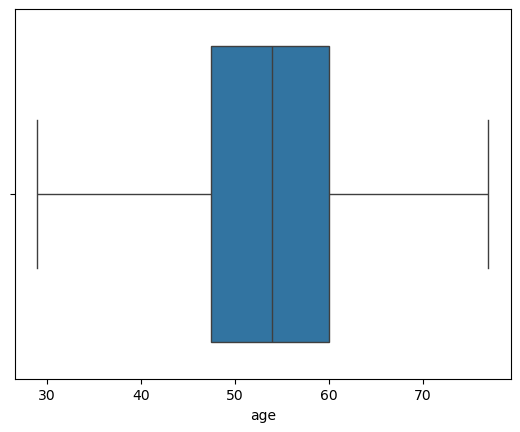

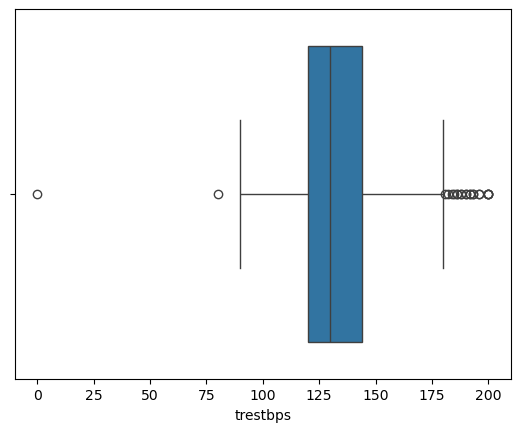

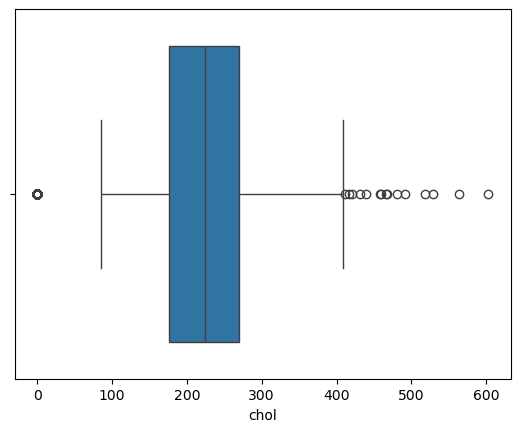

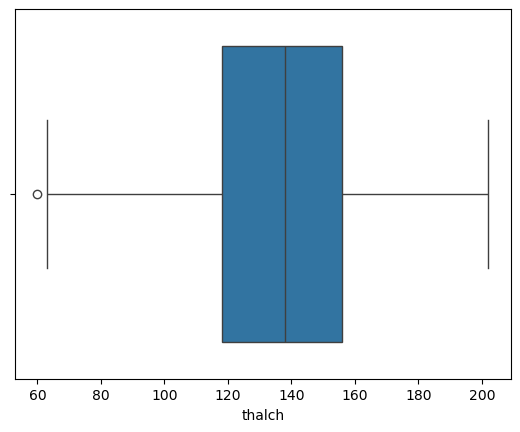

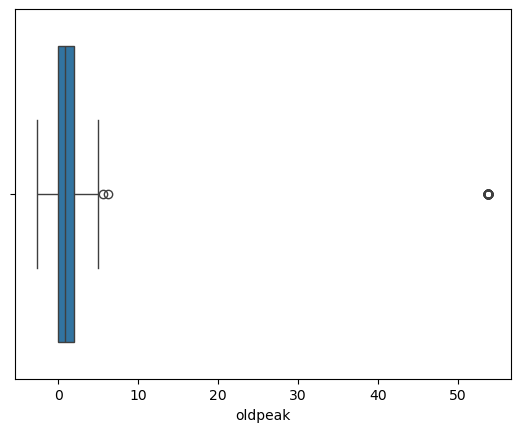

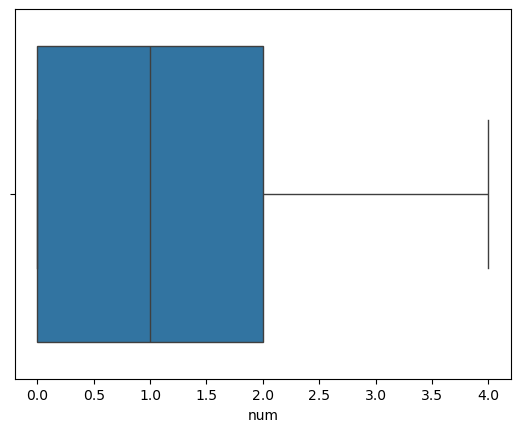

In [62]:
##Find outliers using boxplot for  dataset
for i in Heart_data.select_dtypes(include="number").columns:
    sns.boxplot(data=Heart_data,x=i)
    plt.show()

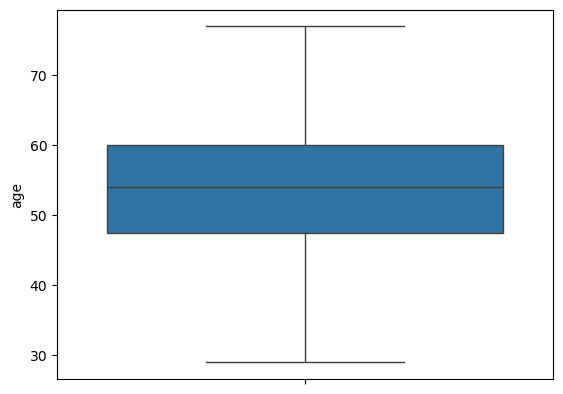

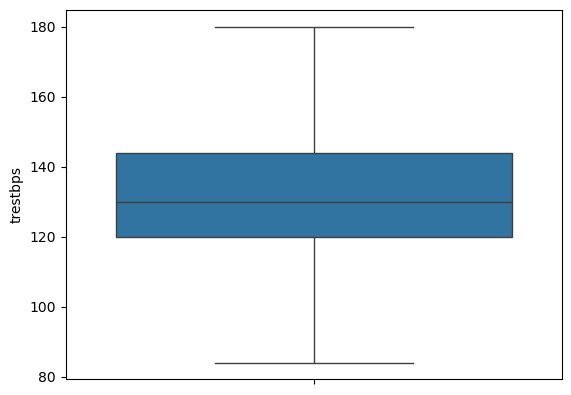

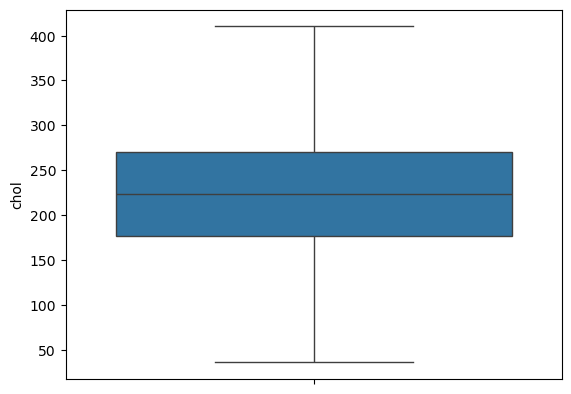

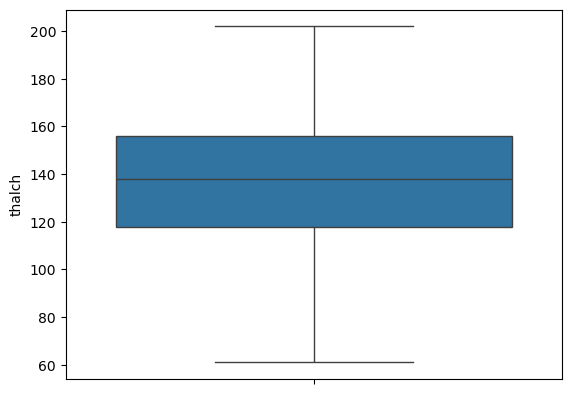

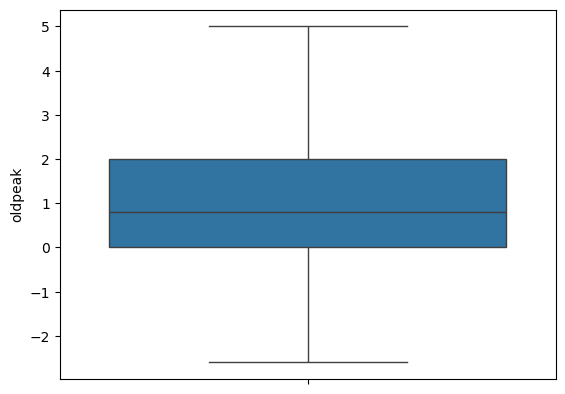

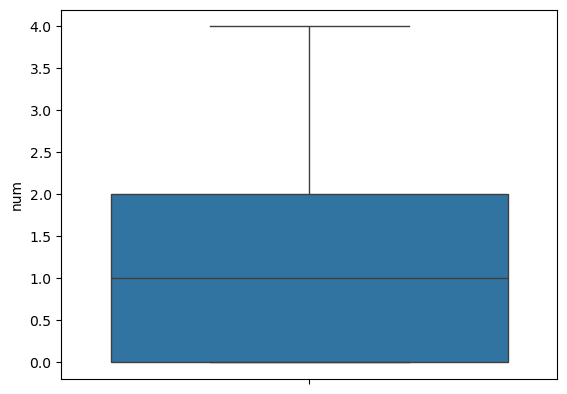

In [17]:
#Treatment for outliers/boxplot capping for  data
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in Heart_data.select_dtypes(include="number").columns:
    lower,upper=remove_outlier(Heart_data[i])
    Heart_data[i]=np.where(Heart_data[i]<lower,lower,Heart_data[i])
    Heart_data[i]=np.where(Heart_data[i]>upper,upper,Heart_data[i])

#box plot after capping  train dataset
for i in Heart_data.select_dtypes(include="number").columns:
    sns.boxplot(Heart_data[i])
    plt.show()

In [40]:
#summary data
print("The Five summary for data:\n")
print(Heart_data.describe())

The Five summary for data:

              age    trestbps        chol      thalch     oldpeak         num
count  907.000000  907.000000  907.000000  907.000000  907.000000  907.000000
mean    53.787211  133.412348  201.465270  135.976847    4.508373    1.007718
std      9.162016   20.405432  112.158285   26.813075   13.398661    1.144594
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.500000  120.000000  176.500000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.800000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    2.000000    2.000000
max     77.000000  200.000000  603.000000  202.000000   53.791850    4.000000


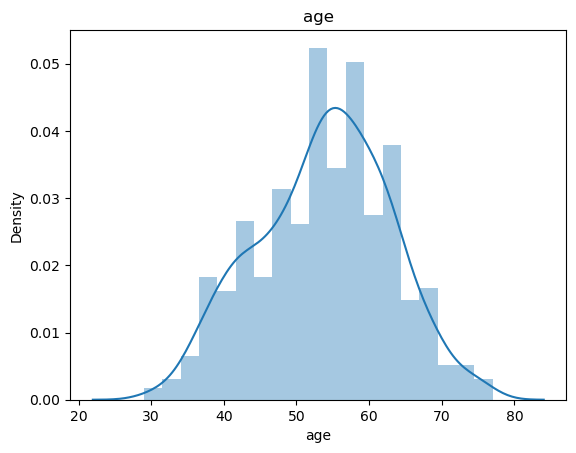

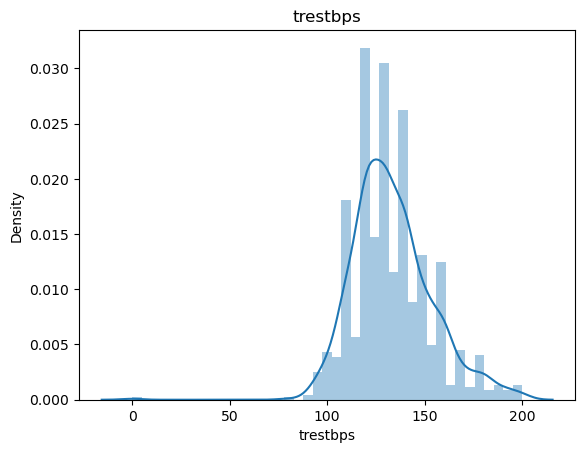

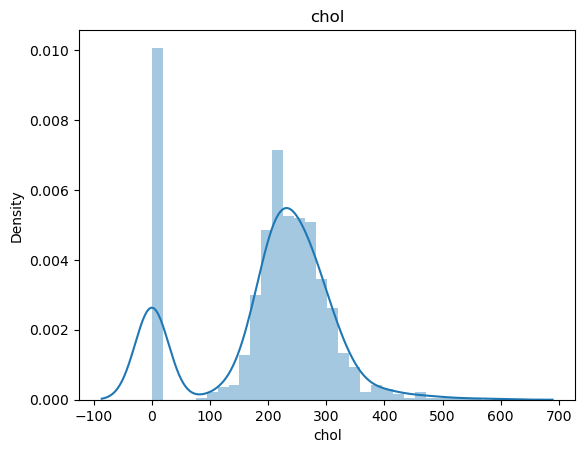

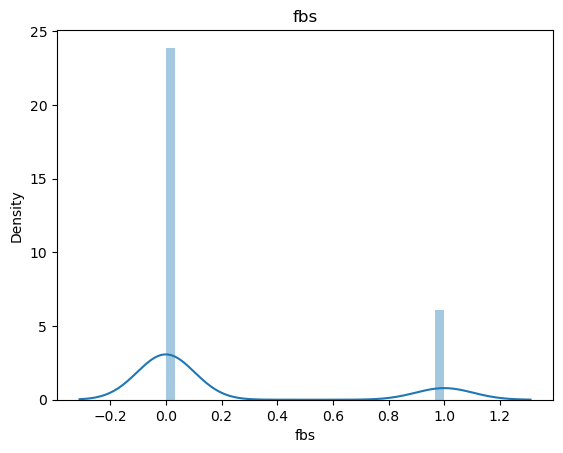

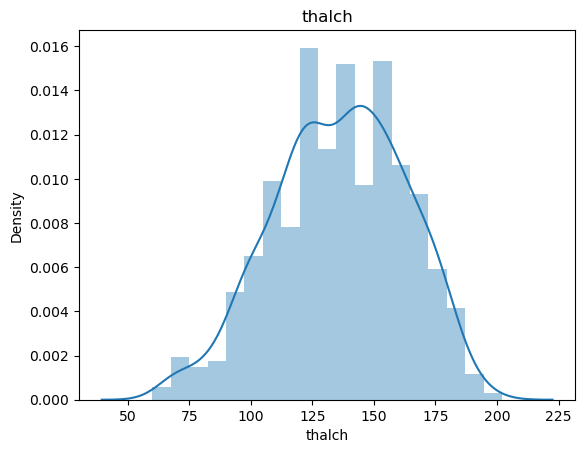

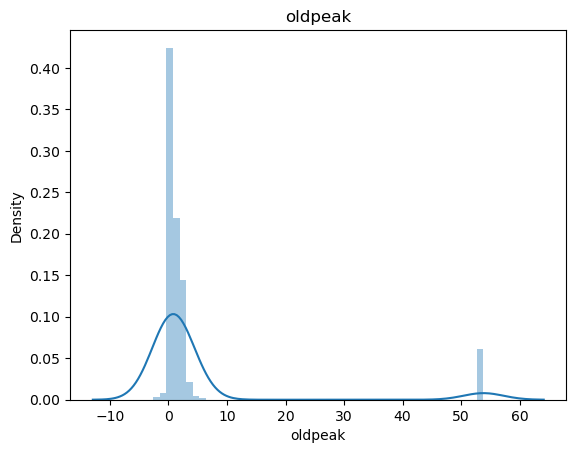

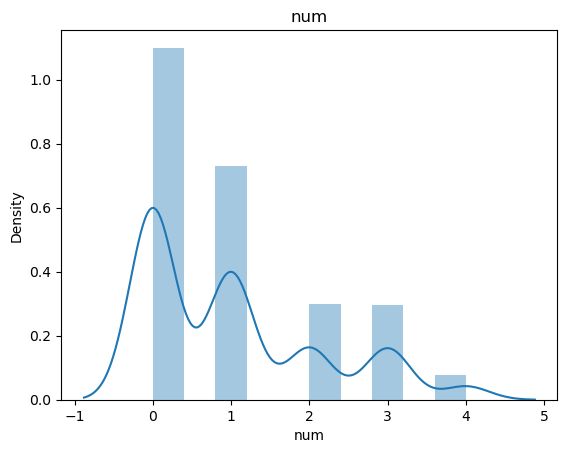

In [27]:
#check that the input data is symmetrically distributed for  dataset
num=Heart_data.select_dtypes(exclude=["object"])
import warnings
warnings.filterwarnings("ignore")
for k in num:
    if k!="sex":
        sns.distplot(Heart_data[k])
        plt.title(k)
        plt.show()

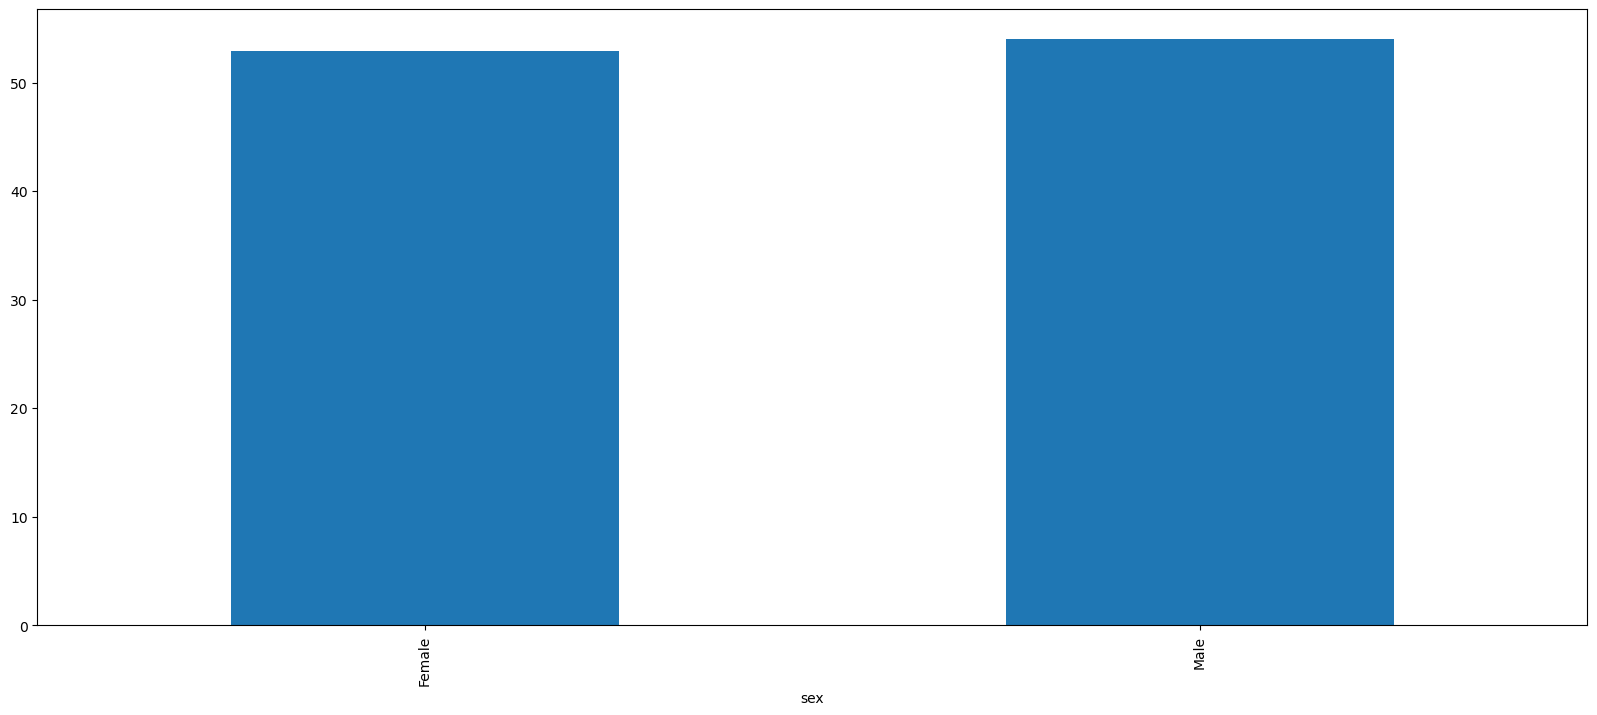

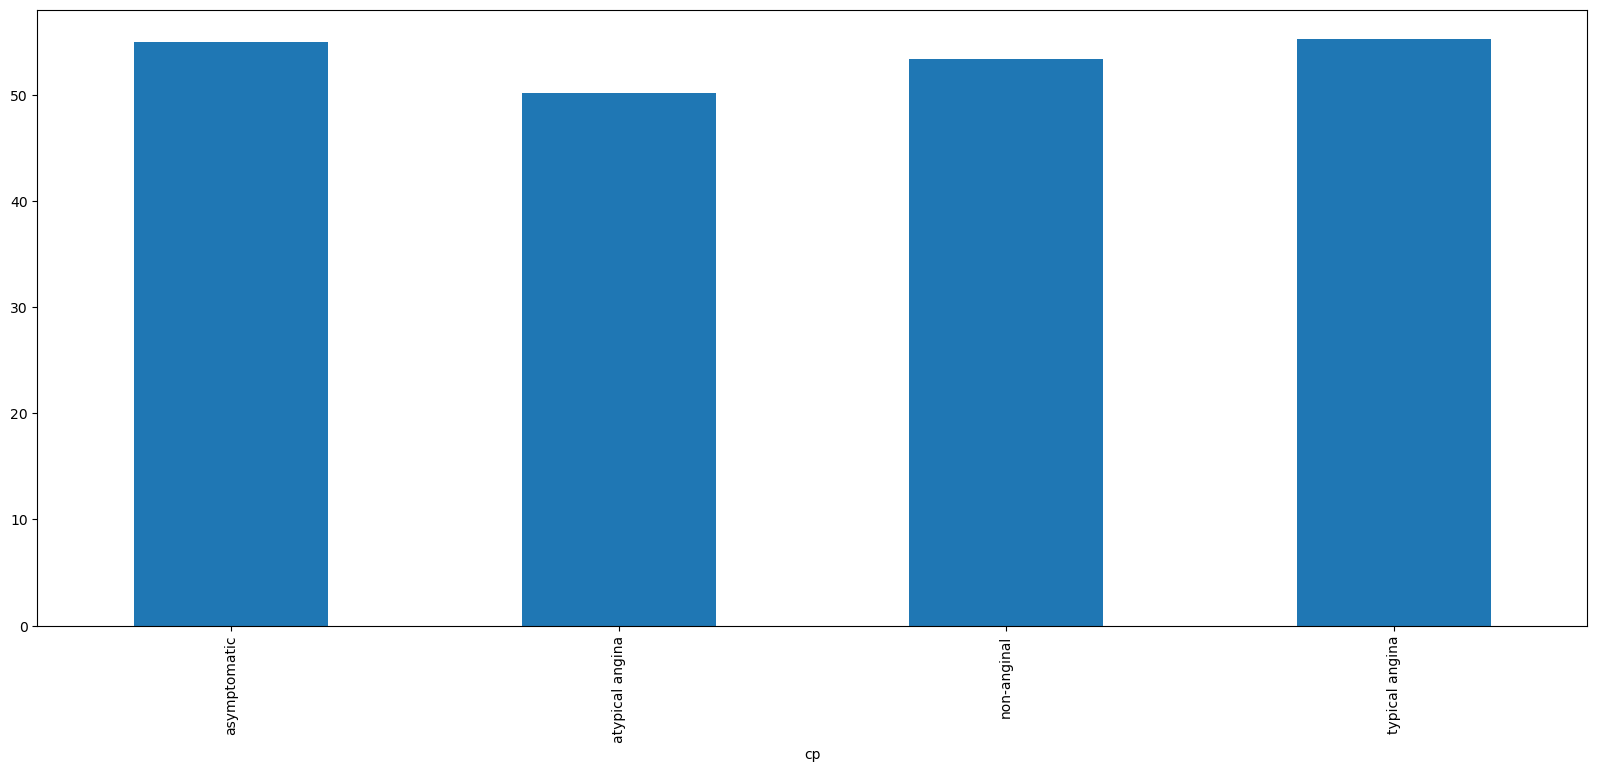

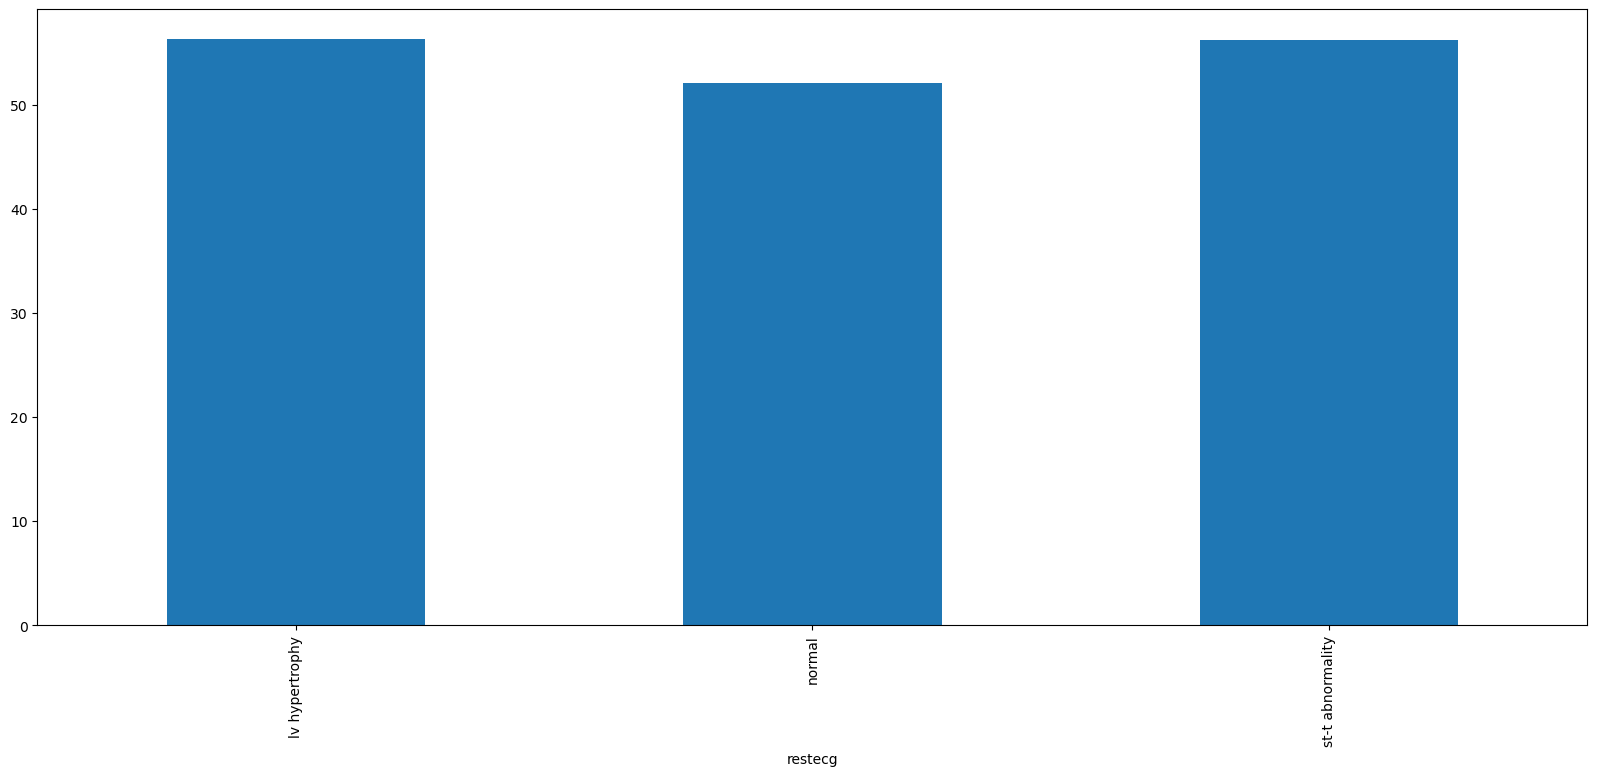

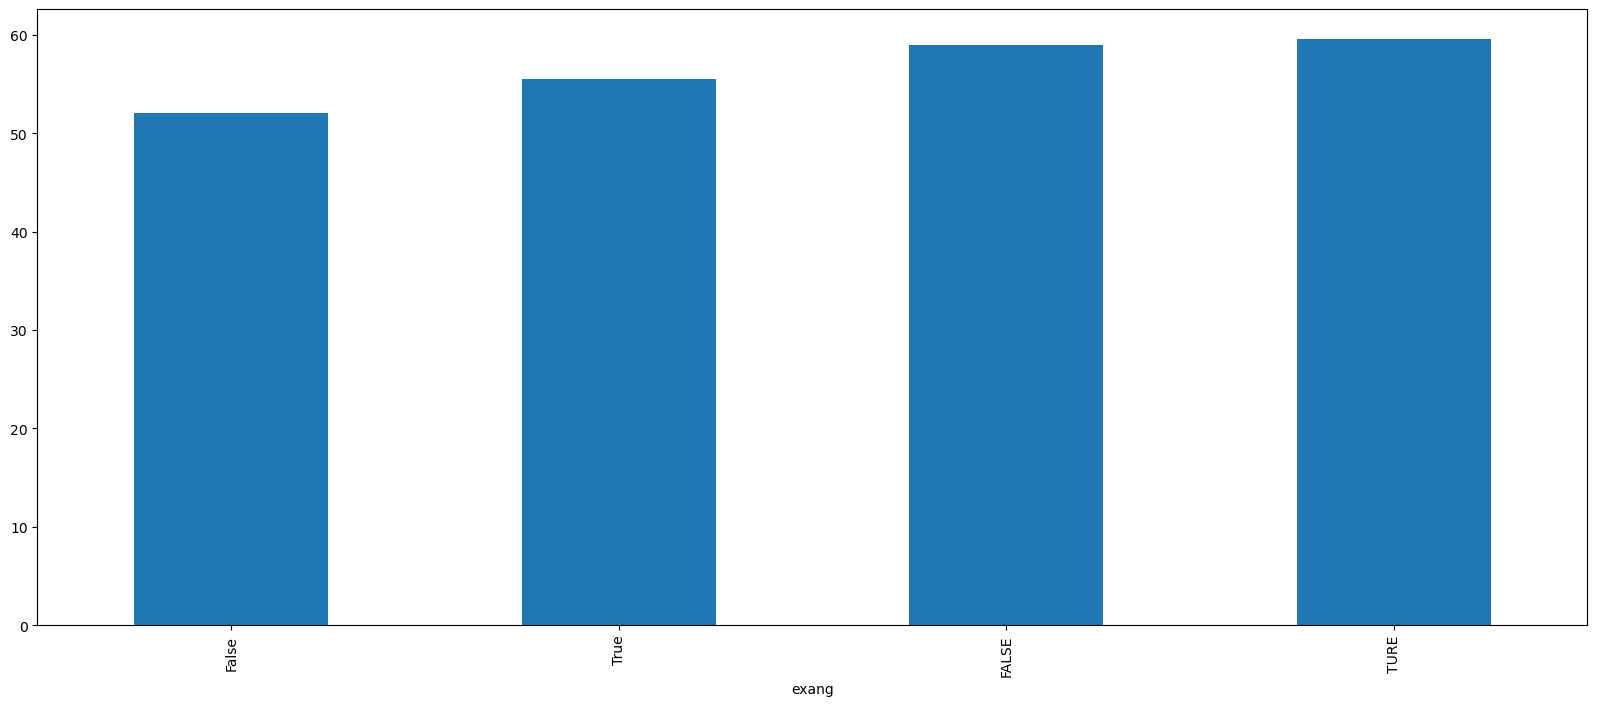

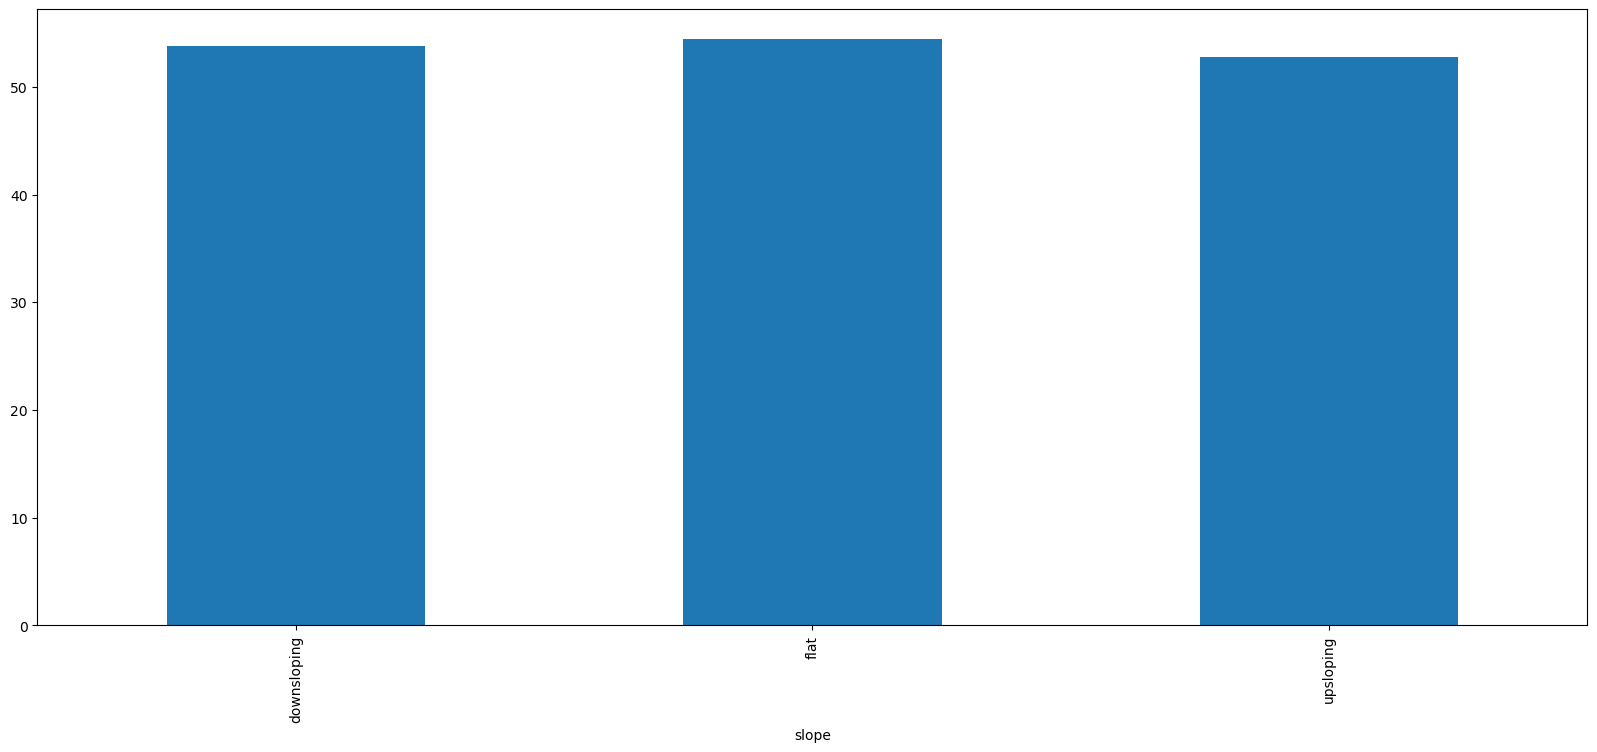

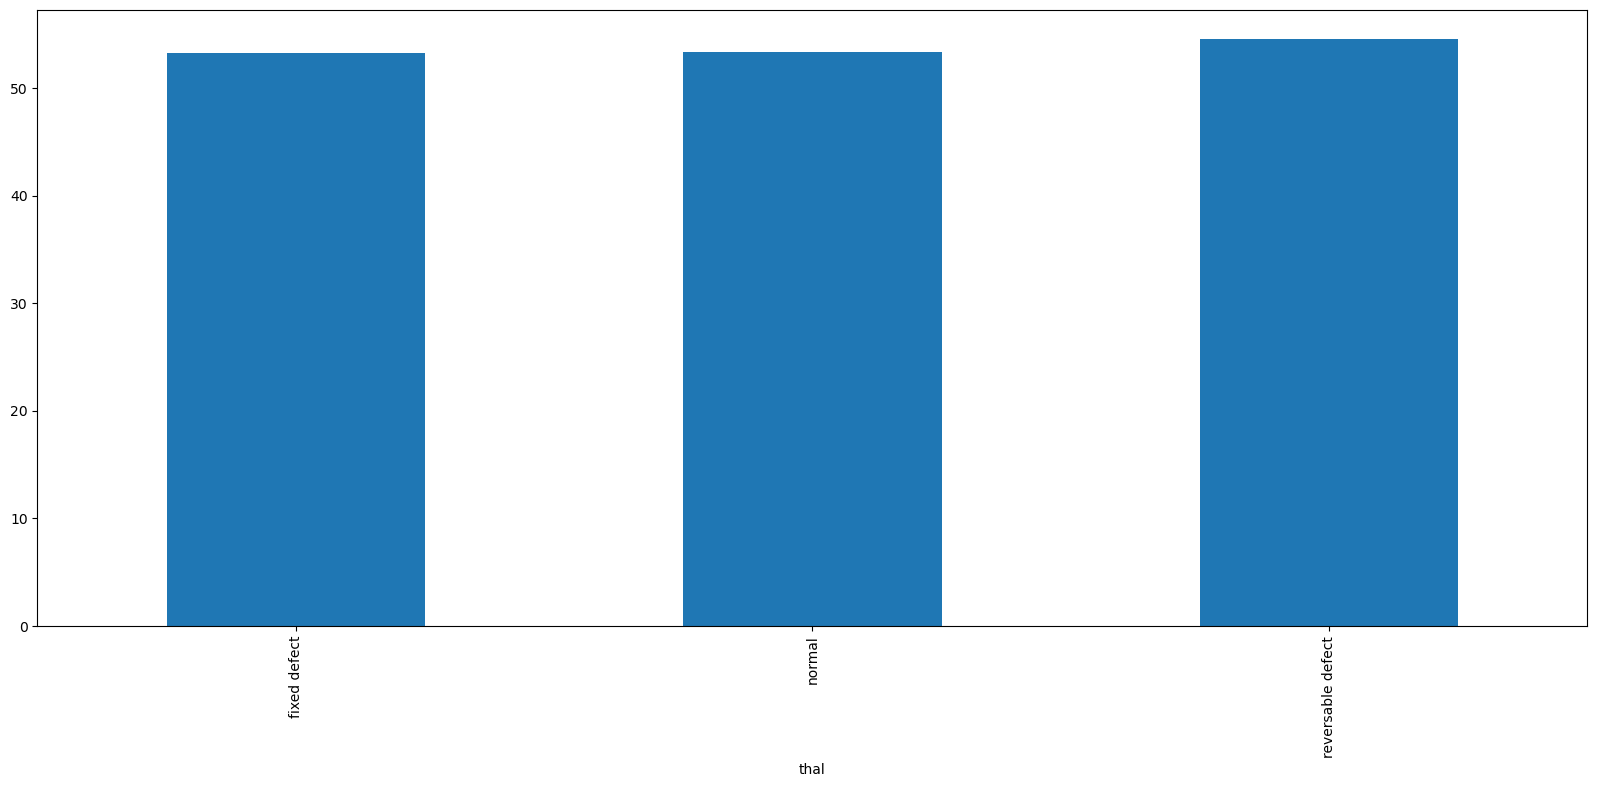

In [42]:
categorical_data=Heart_data.select_dtypes(include="object")
#relationship between categorical  dataset with other variable
for k in categorical_data:
    if k!="age":
        plt.figure(figsize=(20,8))
        Heart_data.groupby([k])["age"].mean().plot.bar()
        plt.show()

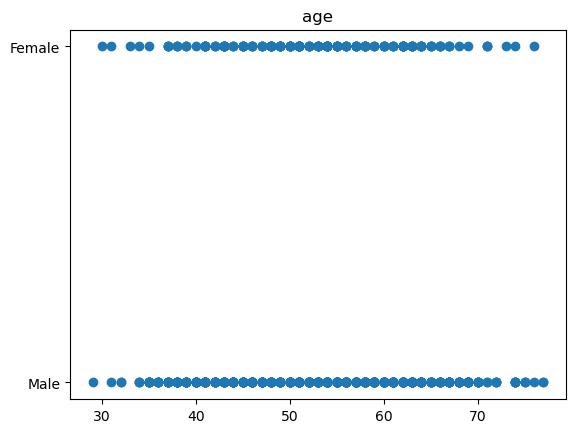

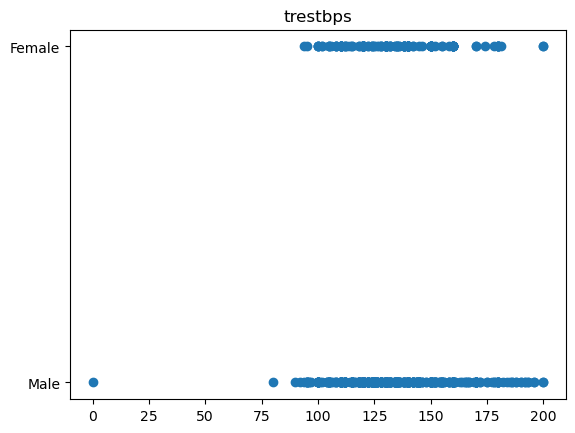

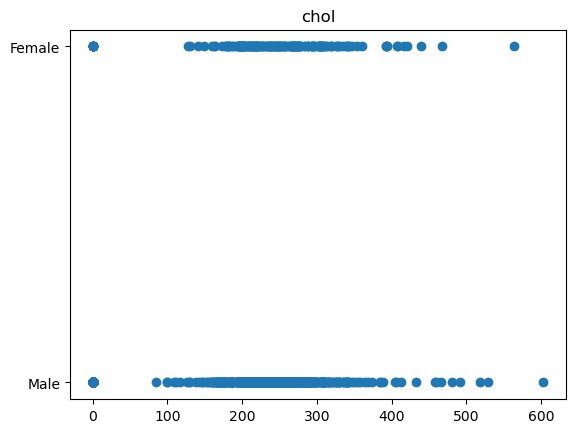

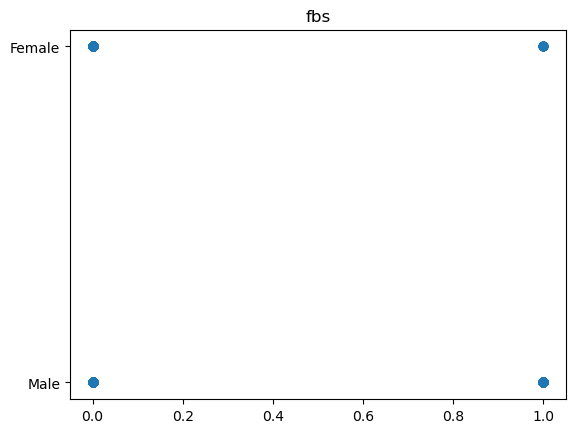

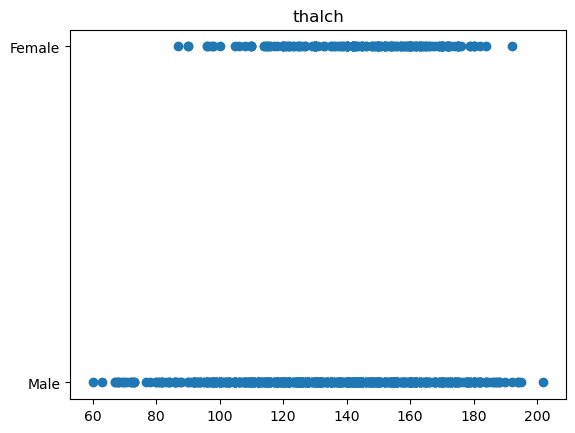

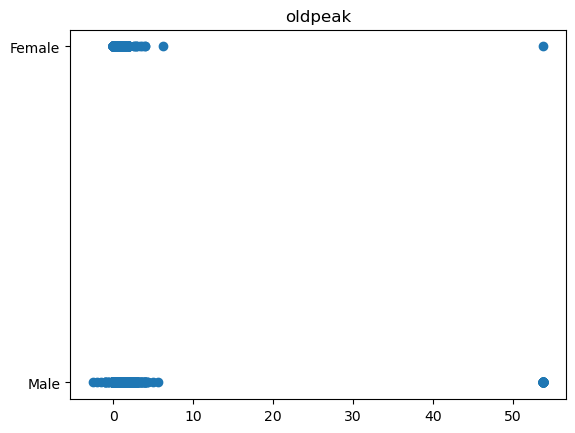

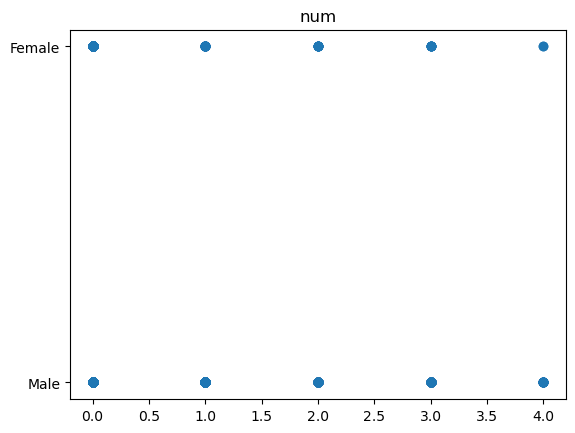

In [44]:
#plot scatterplot against numerical variable of  data
for k in num:
    if k!="sex":
        plt.scatter(Heart_data[k],Heart_data["sex"])
        plt.title(k)
        plt.show()

In [170]:
#Feature Engineering
#label encoding for categorical data
#convert the categorical variable into numerical variable for data
from pandas.core.arrays import boolean
Heart_data["cp"]=Heart_data["cp"].astype('category')
Heart_data["cp"]=Heart_data["cp"].cat.codes
Heart_data["fbs"]=Heart_data["fbs"].astype('category')
Heart_data["fbs"]=Heart_data["fbs"].cat.codes
Heart_data["restecg"]=Heart_data["restecg"].astype('category')
Heart_data["restecg"]=Heart_data["restecg"].cat.codes
Heart_data["exang"]=Heart_data["exang"].astype('category')
Heart_data["exang"]=Heart_data["exang"].cat.codes
Heart_data["slope"]=Heart_data["slope"].astype('category')
Heart_data["slope"]=Heart_data["slope"].cat.codes
Heart_data["thal"]=Heart_data["thal"].astype('category')
Heart_data["thal"]=Heart_data["thal"].cat.codes
Heart_data["sex"]=Heart_data["sex"].astype('category')
Heart_data["sex"]=Heart_data["sex"].cat.codes
print(Heart_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int8   
 2   cp        907 non-null    int8   
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int8   
 6   restecg   907 non-null    int8   
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    int8   
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    int8   
 11  thal      907 non-null    int8   
 12  num       907 non-null    int64  
dtypes: float64(1), int64(5), int8(7)
memory usage: 55.8 KB
None


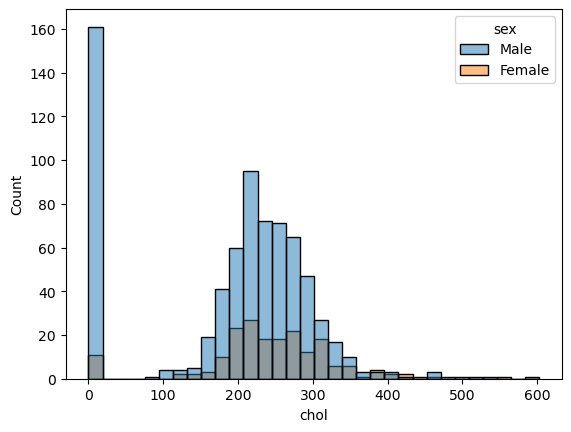

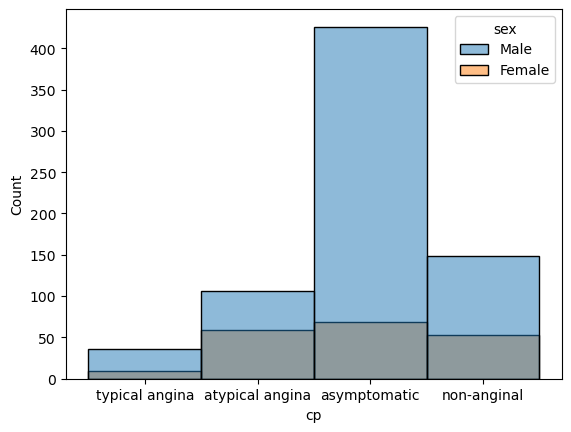

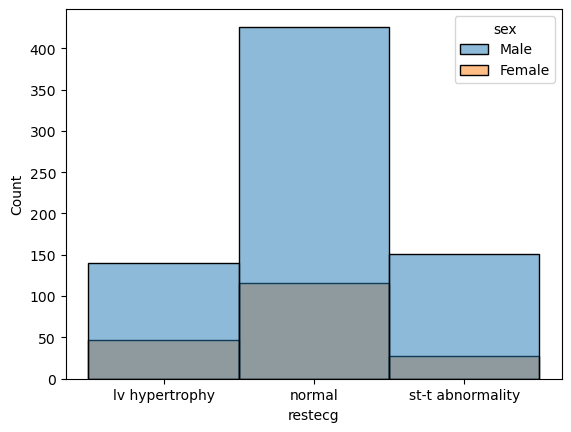

In [82]:
#histogram plot
sns.histplot(x="chol",data=Heart_data,hue="sex")
plt.show()
sns.histplot(x="cp",data=Heart_data,hue="sex")
plt.show()
sns.histplot(x="restecg",data=Heart_data,hue="sex")
plt.show()

In [454]:
x=Heart_data.drop(columns=["cp"])
y=Heart_data["cp"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)

In [456]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree=tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [458]:
#accuracy
from sklearn.metrics import accuracy_score
print("The actual accuracy for test data:",end="")
a=accuracy_score(y_test,y_pred)
print(a)

The actual accuracy for test data:0.5164835164835165


In [460]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print("The confusion matrix for data:")
c=confusion_matrix(y_test,y_pred,labels=[0,1])
print(c)

The confusion matrix for data:
[[65 14]
 [ 9 13]]


In [470]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       103
           1       0.39      0.38      0.39        34
           2       0.39      0.38      0.39        39
           3       0.05      0.17      0.07         6

    accuracy                           0.52       182
   macro avg       0.39      0.39      0.38       182
weighted avg       0.57      0.52      0.54       182



In [472]:
#select feature name
x=Heart_data.drop(columns=["cp"])
feature_names=x.columns
print(feature_names)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [474]:
from sklearn.model_selection import RandomizedSearchCV
parameters={"max_depth":(10,30,50,70,90,100),
             "criterion":("gini","entropy"),
            "max_depth":(3,5,7,9,10),
            "min_samples_split":(2,4,6)
           }
val=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameters,cv=5,verbose=True)

In [476]:
val.fit(x_train,y_train)
y_pred1=val.predict(x_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [478]:
#check best accuracy
print("The best estimation of criterion,max_depth,sample_split of data")
print(val.best_estimator_)

The best estimation of criterion,max_depth,sample_split of data
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=6)


In [480]:
#build model based of best accuracy

best_model=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=6)
best_model.fit(x_train,y_train)
best_pred=best_model.predict(x_train)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


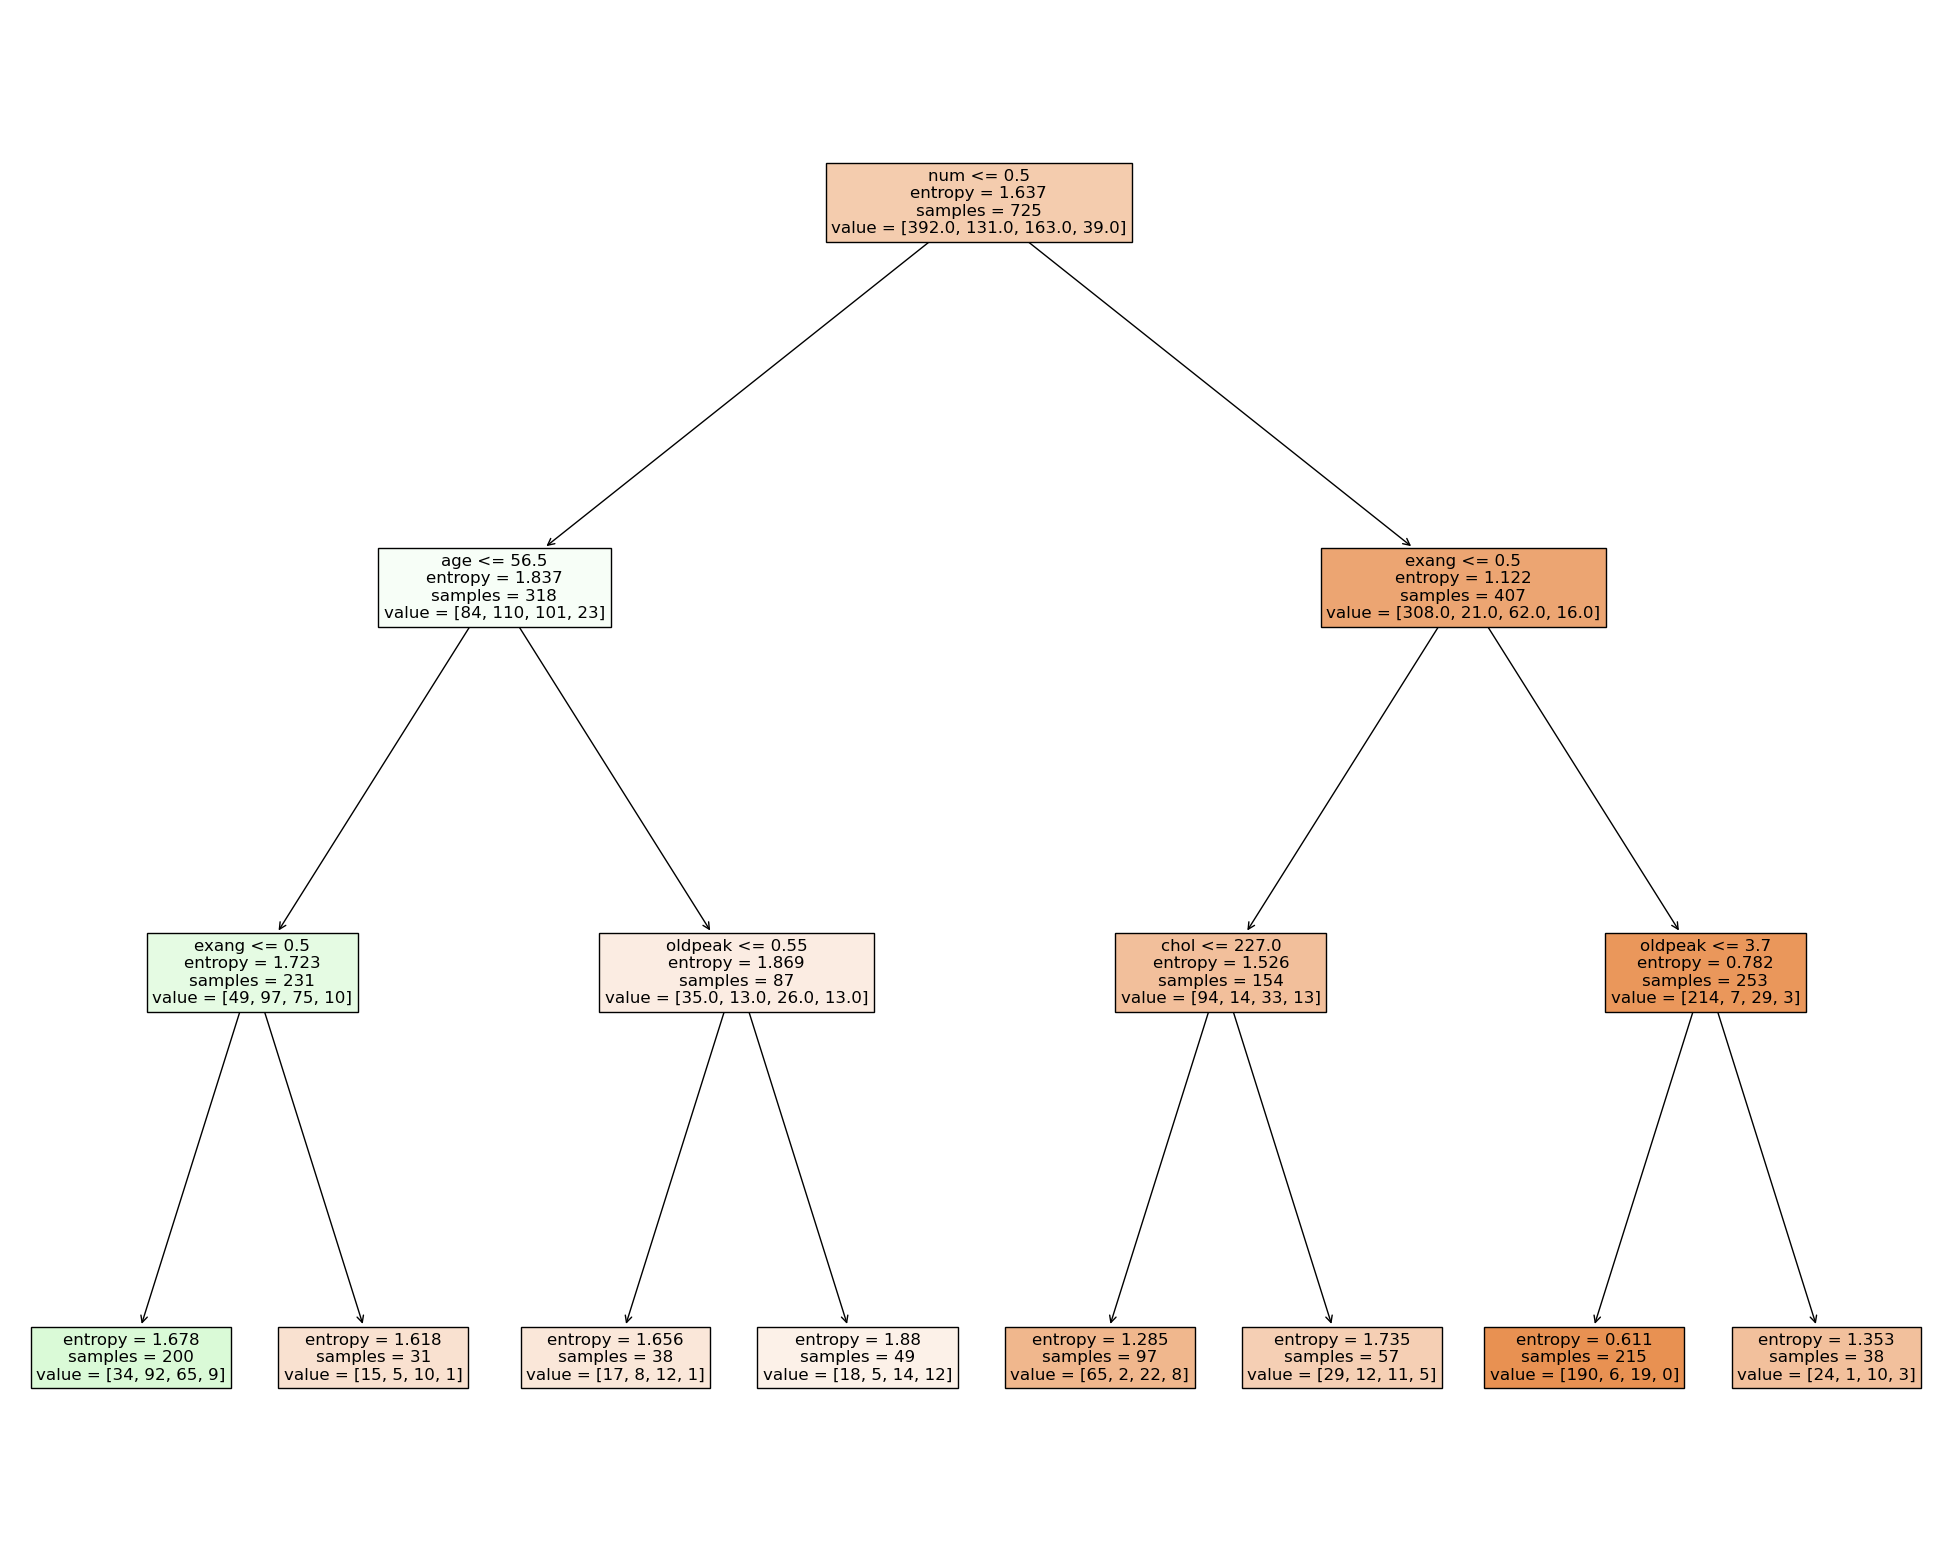

In [482]:
#plot the tree
x=Heart_data.drop(columns=["cp"])
feature_names1=x.columns
print(feature_names)

from sklearn import tree
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(best_model,
                 feature_names=feature_names1,
                 filled=True,
                  fontsize=12)
                 